<a href="https://colab.research.google.com/github/schase15/KNN_Algorithm/blob/master/KNN_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Implementing K Nearest Neighbors By Hand

### This notebook includes the code for implementing the K Nearest Neighbors algorithm by hand
My algorithm for K Nearest Neighbors is implemented as a Python class using only base python, numpy and scipy.

I then selected a data set and compare the results of my own KNN algorithm to the results of the standard KNN from sklearn.

## Theory Behind KNN

K Nearest Neighbors is a simple machine learning model that makes predictions based off of the most similar observations in its traing data. While it can be very powerful, its predictive capability is limited to observations that are similar to what the training data it has in memory.

Unlike most other models, KNN does not 'learn' from its training dataset. Instead it holds the entire training set in memory and then compares the new observation to its stored data. KNN performs no work until a prediction is required.

When a prediction is required it does exactly what it name says. The model examines the new observation and finds the most similar records (nearest neighbors) that it holds in its training set. The number of neighbors (k) the model selects from its training data is defined by the user. 

A prediction can be made by either returning the most common outcome (classification) or by taking the average (regression).

**Some Important Notes on Using KNN**

- KNN is a simple model to implement, but as a result it is limited in the types of data it can take as input. When working with KNN the phrase "garbage in, garbage out" is never more accurate. KNN does not handle categorical variables so everything must be pre-processed to include numerical values only. Additionally, as you will see in the next section, the nearest neighbors are found by calculating the distances between the new observation and the records held in memory. Those with the smallest distances are considered most similar. Intuatively, you should understand the importance of scaling your data (so that they are all being measured on the same metric) before running a KNN model. 

## Algorithm Implementation
Now that we understand the theory behind KNN, we can implement our own algorithm from scratch in three setps.

Step 1. Calculate Euclidean Distance

Step 2. Get Nearest Neighbors

Step 3. Make Predicitons

### Step 1: Calculate Euclidean Distance


The formula for Euclidean Distance is:

$ \sum_{i=1}^n (x_{i}-y_{i})^2 $



The Euclidean Distance may sound complicated, and the formula may look intimitating. But the concept is very simple. The Euclidean Distance is the ordinary straight line distance between two data points. The formula can be simply derived from the Pythagorean formula: 

Pythagorean Theorem:

$c^2 = a^2 + b^2 $

Where c is the Euclidean distance between datapoints a and b.

For simplicity, let's first say that data point a and b are 2-Dimensial and described by their x and y coordinates.

a= ($a_{1}, a_{2}$) and b= ($b_{1}, b_{2}$).

To help with understanding, visually we can view this on a graph. On the graph below data points a and b have been ploted (represented by the large arrowheads). The Euclidean distance we are trying to calculate is the vector drawn in yellow.

By drawing in the vectors representing the datapoints (in blue and red) we can clearly see that the yellow Euclidean distance is simply the hypotenuse of the triangle. 

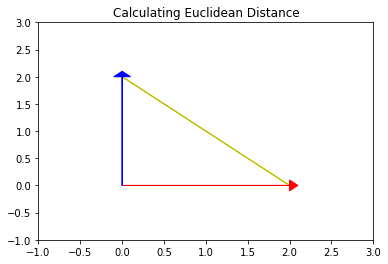

In [30]:
# Import matplotlib
import matplotlib.pyplot as plt

# Coordinate Pairs for where the datapoints are (represented by the arrowheads 
# at the end of the vectors)

# Datapoint a
red = (2, 0)

# Datapoint b
blue = (0, 2)

# Axis Bounds
plt.xlim(-1,3)          
plt.ylim(-1,3)

# Plot Vectors
plt.arrow(0, 2, 2, -2, head_width=.02, head_length=0.01, color = 'y')
plt.arrow(0, 0, 2, 0, head_width=.2, head_length=0.1, color = 'r')
plt.arrow(0, 0, 0, 2,  head_width=.2, head_length=0.1, color = 'b')
plt.title('Calculating Euclidean Distance')
plt.show()


We know that the length of the vectors for point a and b can be calculated by |$a_{1} - b_{1}$| and |$a_{2} - b_{2}$|

So it follows that,

$c^2 = (a_{1}-b_{1})^2 + (a_{2}-b_{2})^2 $

$c = \sqrt{(a_{1}-b_{1})^2 + (a_{2}-b_{2})^2} $

This is the basic formula for Euclidean Distance for 2-D datapoints.

However, this can be expanded to 3-D and beyond leaving us with the finalized formula of Euclidean Distance we saw above.

$c = \sqrt{(a_{1}-b_{1})^2 + (a_{2}-b_{2})^2 + (a_{3}-b_{3})^2 + ... + (a_{n}-b_{n})^2} $

More succintly written as,

$ \sum_{i=1}^n (a_{i}-b_{i})^2 $


**Given our understanding of the mathmatics behind calculating the Euclidean distance, how can we write that calculation in python?**

When working with datasets, each row is a datapoint. Each column represents another dimension of the datapoint (but that leads us off track into the subject of dimensionality and furthermore the curse of dimensionality). If you don't know what I am talking about, it is a crucial concept to understand when building your own machine learning models. For the purposes of this article, I will leave further research of that topic to you.

To calculate the Euclidean distance between two points we can use the following function.

In [32]:
# Helper method to calculate the square root
def sq_rt(x):
  return x** 0.5

# Calculate the Euclidean distance between two vectors (datapoints)
def euclidean_distance(row_1, row_2):     # For datapoint row 1 and datapoint row 2
  # Save a distance variable to save sum of calculations to
  distance = 0.0
  # Itereate through each column of the row
  # Except for the last column which is where the target varibale is stored
  for i in range(len(row_1)-1):
    # Calculate the length vectors for each dimension and sum them
    distance += (row_1[i]- row_2[i])**2
  # Return the square root of the sum of the distances
  return sq_rt(distance)

The function above assumes that the output target is the last column of the datapoint and is therefore not included in the distance calculations. In our final KNN class we will have a fit method that saves the X values and the target separately.  

### Step 2: Get Nearest Neighbors

Now that we know how to calculate the distance betweeen two datapoints, we can find the k nearest neighbors (closest instances in the training data) to our new datapoint. 

First we can use the above function to calculate the distances between our new observation and each datapoint in our training set. Once calculated, we can sort these distances and return the instances with the smallest calculated distances.

The below function get_KNN() will implement this idea in python.

In [39]:
# Return the k nearest neighbors to the new observation

# Input is the training data, test observation, and the number of neighbors (k) to return
def get_KNN(train, test_row, k):
  # Save the rows and calculated distances in a tuple
  distances = list()

  # Iterate through each row in the training data
  # Use the euclidean distance function to calculate the distances between the train row and the new observation
  for train_row in train:
    euc_dist = euclidean_distance(test_row, train_row)
    # Save the row and calculated distance
    distances.append((train_row, euc_dist))

  # Sort by using the calculated distances (the second item in the tuple)
  distances.sort(key= lambda tup: tup[1])
  
  # Populate a list with k nearest neighbors
  n_neighbors = list()

  # Get the nearest k neighbors by returning the k first instances in the sorted distances list
  # Return just the first value in the tuple (the row information)
  for i in range(k):
    n_neighbors.append(distances[i][0])
  
  # Return the list of nearest neighbors
  return n_neighbors

### Step 3: Make Predictions

We have used our knowledge of Euclidean Distance to find the k nearest neighbors to our test datapoint. Now we can make predictions, the whole point of the model.

We have the most similar instances from the dataset to our test observation. Intuatively, by looking at the target outputs of our nearest neighbors, we should be able to predict an output for our test case.

**Classification**:
For a classification problem, that is as simple as counting up the instances of each output across the k nearest neighbors. Our prediction for our test datapoint will be whichever output occured most frequnetly in the nearest neighbors. 

The function below utilizes the output from the get_KNN() function to implement the idea of classification prediction in python:

In [41]:
# Make a classification prediction with k nearest neighbors
def predict_classification(train, test_row, k):
  # Find the nearest neighbors
  n_neighbors = get_KNN(train, test_row, k)

  # Populate a list with the target output (the last column) from each KNN row
  output_values = [row[-1] for row in n_neighbors]

  # Make prediction by counting each occurance of output values
  # Return the output value that occurs the most frequently
  prediction = max(set(output_values), key= output_values.count)
  # Return the prediction
  return prediction

**Regression**
For a regression problem, we use the same logic of looking at the output values of the K nearest neighbors. Instead of returning the most common occurance, we will return the mean value of the output values as the regression prediction.
The function below utilizes the output from the get_KNN() function to make a regression prediction in python.

In [45]:
# Make a regression prediction with k nearest neighbors
def predict_regression(train, test_row, k):
  # Find the nearest neighbors
  n_neighbors = get_KNN(train, test_row, k)

  # Populate a list with the target output (the last column) from each KNN row
  output_values = [row[-1] for row in n_neighbors]

  # Make prediction by calculating the mean of the output values from the nearest neighbors
  prediction = sum(output_values) / len(output_values)
  # Return the prediction
  return prediction

The two prediction functions created above are for making a prediction for one new data point. That was primarily for ease of understanding. Generally, we are not looking for a single prediction, but a prediction for each point in a large dataset. To adapt the above functions to handle multiple predictions, just iterate through your new dataset, calling the predict function on each point

The code below will accomplish that for classification.

In [ ]:
# Create predictions for multiple new datapoints, classification

def multiple_classifications(train, test, k):
  # Create a list to hold all of the predictions
	predictions = list()
 
  # For each row in the test data, call the predict function
  for row in test:
		predicted_output = predict_classification(train, row, k)
		predictions.append(predicted_output)
  
  # Return the populated list of predictions
  return predictions

The above can be similarly modified to handle regression predictions.

## Put the pieces together in a KNN class

Now that we have all of the pieces, we can wrap them all in a K Nearest Neighbor class. All of the functions defined above will be methods that you can call on the class.

In [ ]:
# K Nearest Neighbors Class
'''
Class is initialized by setting k (number of nearest neighbors you want to look at)
Then call the .fit() method to save the X_train matrix and y_train vector
The method .predict_classification() will return classification predictions given X_test
The method .predict_regression() will return regression predictions given X_test
'''

class KNN():
  def __init__(self, k=3):
    # k is number of nearest neighbors to return, default is 3
    self.k = k


  def sq_rt(self, x):
    '''
    Helper method to return the square root.
    To be used in Euclidean Distance calculations.
    '''    
    return x**0.5

  def euclidean_distance(self, row_1, row_2):
    '''
    Helper method to calculate the Euclidean Distance between two points, (row_1 and row_2).
    To be used in get_KNN to calculate the closest training points to the test data.
    '''
    # Save a distance variable to save sum of calculations to
    distance = 0.0
    # Itereate through each column of the row
    # Except for the last column which is where the target varibale is stored
    for i in range(len(row_1)-1):
      # Calculate the length vectors for each dimension and sum them
      distance += (row_1[i]- row_2[i])**2
    # Return the square root of the sum of the distances
    return self.sq_rt(distance)

  def fit(self, X_train, y_train):
    '''
    Fits the training data to the model.
    KNN does this by simply saving the training data in memory.
    '''
    self.X_train = X_train
    self.y_train = y_train

  def get_KNN(self, test_row):
    '''
    Helper method for prediction methods.
    Will take in one test row and calculate the k nearest neighbors.
    Returns a list of nearest neighbors.
    '''

    # Save the rows and calculated distances in a tuple
    distances = list()

    # Iterate through each row in the training data
    for i in range(len(self.X_train)):
      # Use the euclidean distance function to calculate the distances between the train row and the new observation
      euc_dist = euclidean_distance(test_row, self.X_train[i])
      # Save the index (to later recall the output value), the row data and the calculated distance
      distances.append((i, self.X_train[i], euc_dist))


    # Sort by using the calculated distances (the third item in the tuple)
    distances.sort(key= lambda tup: tup[2])
    
    # Populate a list with k nearest neighbors
    n_neighbors = list()

    # Get the nearest k neighbors by returning the k first instances in the sorted distances list
    # Return just the first value in the tuple (the row information)
    for i in range(self.k):
      n_neighbors.append(distances[i][:2])
    
    # Return the list of nearest neighbors
    # Don't need to save it to self because we are just using it to populate a list
    # Used for the prediction method.
    # The prediction method will save the important information
    return n_neighbors

  def helper_predict_classification(self, test_row):
    '''
    Method returns a classification prediction for a single given test datapoint.
    This method will be utilized in the predict_classification method which will be 
    capable of making predictions for a large X_test dataset.
    '''

    # Find the nearest neighbors
    n_neighbors = self.get_KNN(test_row)

    # Use the index values of the nearest neighbors to recall their target outputs

    # Store the index values of the n_neighbors
    train_output = [n_neighbors[i][0] for i in range(self.k)]    

    # Use the index values from the n_neighbors to return their associated outputs from y_train
    output_values = [self.y_train[value] for value in train_output]

    # Make a prediction by counting each occurance of output values
    # Return the output value that occurs the most frequently
    prediction = max(set(output_values), key= output_values.count)
    # Return the prediction
    return prediction

  def predict_classification(self, X_test):
    '''
    Method utilizes the helper_predict_classification to return predictions for 
    multiple test rows stored in X_test.
    '''
    self.X_test = X_test

    # Create a list to hold all of the predictions
    predictions = []

    # For each row in X_test, call the predict_classification helper method
    for test_row in self.X_test:
      predicted_output = self.helper_predict_classification(test_row)

      # Save the prediction for each row in X_test
      predictions.append(predicted_output)

    # Return the list of predictions for each datapoint in X_test
    return predictions

  def helper_predict_regression(self, test_row):
    '''
    Method returns a regression prediction for a single given test datapoint.
    This method will be utilized in the predict_classification method which will be 
    capable of making predictions for a large X_test dataset.
    '''

    # Find the nearest neighbors
    n_neighbors = self.get_KNN(test_row)

    # Use the index values of the nearest neighbors to recall their target outputs

    # Store the index values of the n_neighbors
    train_output = [n_neighbors[i][0] for i in range(self.k)]    

    # Use the index values from the n_neighbors to return their associated outputs from y_train
    output_values = [self.y_train[value] for value in train_output]

    # Make prediction by calculating the mean of the output values from the nearest neighbors
    prediction = sum(output_values) / len(output_values)

    # Return the prediction
    return prediction

  def predict_regression(self, X_test):
    '''
    Method utilizes the helper_predict_classification to return predictions for 
    multiple test rows stored in X_test.
    '''
    self.X_test = X_test

    # Create a list to hold all of the predictions
    predictions = []

    # For each row in X_test, call the predict_classification helper method
    for test_row in self.X_test:
      predicted_output = self.helper_predict_regression(test_row)

      # Save the prediction for each row in X_test
      predictions.append(predicted_output)

    # Return the list of predictions for each datapoint in X_test
    return predictions


## Comparing Scikit-Learn's KNN with our own KNN algorithm
Let's see how our algorithm compares to Scikit-Learn's KNN implementation

### Titanic Dataset
We will work with a very common and easily accessable dataset to make it easier for readers to follow along.

The Titanic dataset is one of the most popular datasets for begining to learn classification models. The data is already cleaned and has a clear classification target of survived or did not survive. After only a few basic pre-processing steps, we will have a perfect dataset for our KNN model.

We will only work with classification. After following along with this article, try to implement a regression problem with the KNN class we created.

*Download your own copy of the Titanic dataset and follow along.*  https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv

### Resources

*Jason Brownlee, 'Develop k-Nearest Neighbors in Python From Scratch', Machine Learning Mastery. https://machinelearningmastery.com/tutorial-to-implement-k-nearest-neighbors-in-python-from-scratch/*